# Numerical Differentiation and Integration

## Numerical Differentiation

### Introduction

Suppose we have the trajectory of a projectile moving in the vertical direction as a function of time, $y(t)$. 

If we wish to determine its speed, we would need to take the derivative of the position with respect to time, i.e. $v(t) = \mathrm{d}y/\mathrm{d}t$. 

e.g. suppose the trajectory, *measured experimentally*, looks like the following plot:

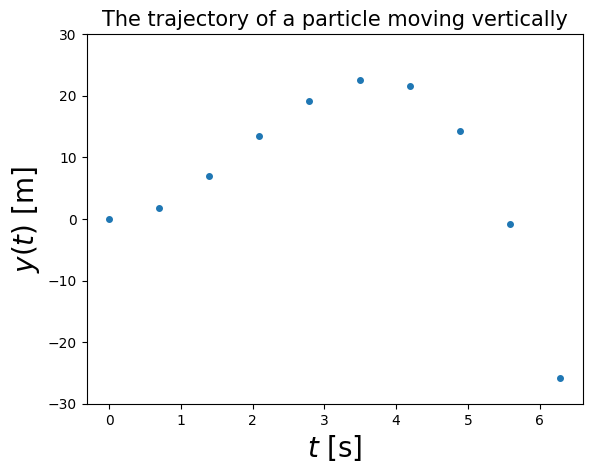

In [1]:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

t = np.linspace(0, 2 * np.pi, 10) # creates a NumPy array for time
y = 5*np.power(t,2) - t * np.exp(-t) - 0.9*np.power(t,3) # the function

fig, ax = plt.subplots() # create the elements required for matplotlib. 

# set the labels and titles:
ax.set_xlabel(r'$t$ [s]', fontsize=20) # set the x label
ax.set_ylabel(r'$y(t)$ [m]', fontsize=20) # set the y label. 
ax.set_title('The trajectory of a particle moving vertically', fontsize=15) # set the title 

# make a one-dimensional plot using the above arrays, add a custom label
ax.plot(t, y, lw=0, ms=4, marker='o') 

ax.set_ylim([-30, 30]) # set the y limit

plt.show() # show the plot here

Assuming we don't know the analytic form of the function that generated the above, we would like to calculate the speed $v(t)$ numerically. 

The starting point is the mathematical definition of the derivative: 

$ \frac{ \mathrm{d} y(t) } {\mathrm{d} t } \equiv \lim_{h\rightarrow 0} \frac{ y(t+h) - y(t) } { h} $.

Note that a computer would run into errors with this kind of limit: 

- as $h$ is made smaller, the numerator would fluctuate between 0 and machine precision, $\epsilon_m$.
- as the denominator, $h$, approaches zero, overflow would occur.

### The Forward-Difference Derivative

The simplest algorithm for numerical differentiation is called the forward-difference derivative, and it is obtained by simply removing the limit, still taking $h$ reasonably small, i.e.:

$ \left.\frac{ \mathrm{d} y(t) } {\mathrm{d} t } \right|_\mathrm{fd} \equiv \frac{ y(t+h) - y(t) } { h} $.

What is the algorithmic (or approximation) error induced by this procedure? 

To find out, let's look at the Taylor series of $y(t)$ a small step $h$ away from $y(t)$:

$y(t+h) = y(t) + h \frac{\mathrm{d} y(t) } {\mathrm{d} t } + \frac{h^2}{2!} \frac{\mathrm{d}^2 y(t) } {\mathrm{d} t^2 } + \frac{h^3}{3!} \frac{\mathrm{d}^3 y(t) } {\mathrm{d} t^3 } + ...$.

Solving for $\frac{ y(t+h) - y(t) } { h }$, which is nothing but the forward-difference derivative:

$\left.\frac{ \mathrm{d} y(t) } {\mathrm{d} t } \right|_\mathrm{fd} =  \frac{ y(t+h) - y(t) } { h } =   \frac{ \mathrm{d} y(t) } {\mathrm{d} t } - \frac{h}{2} \frac{\mathrm{d}^2 y(t) } {\mathrm{d} t^2 } + ...$

Therefore, the algorithmic error for the forward-difference derivative can be written as:

$\epsilon^\mathrm{fd}_\mathrm{alg} \simeq \frac{h y''}{2}$, where $y''$ is short-hand for the second derivative. 

You can think of the approximation as using two points to represent the function by a straight line in the interval $t$ to $t+h$:


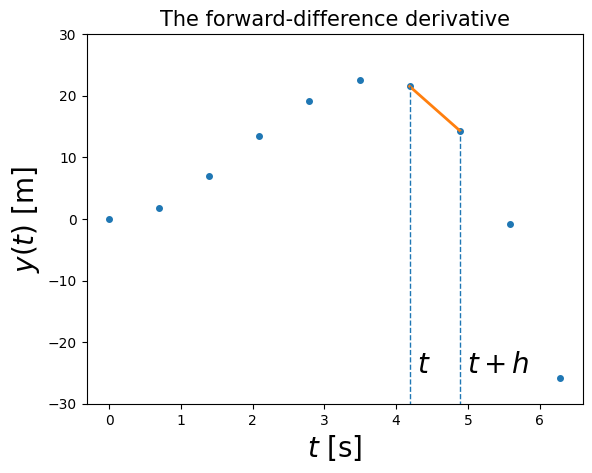

In [2]:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

t = np.linspace(0, 2 * np.pi, 10) # creates a NumPy array for time
y = 5*np.power(t,2) - t * np.exp(-t) - 0.9*np.power(t,3) # take the NumPy array and create another one
fig, ax = plt.subplots() # create the elements required for matplotlib. 
# set the labels and titles:
ax.set_xlabel(r'$t$ [s]', fontsize=20) # set the x label
ax.set_ylabel(r'$y(t)$ [m]', fontsize=20) # set the y label. 
ax.set_title('The forward-difference derivative', fontsize=15) # set the title 

ax.set_ylim([-30, 30]) # set the y limit

# make a one-dimensional plot using the above arrays, add a custom label
ax.plot(t, y, lw=0, ms=4, marker='o') 

# plot a segment of the line and the corresponding t values:
ax.plot(t[6:8], y[6:8], lw=2, ms=0) 
ax.vlines(t[6], ymin=-40, ymax=y[6], lw=1, ls='--')
ax.vlines(t[7], ymin=-40, ymax=y[7], lw=1, ls='--')
ax.text(t[6]+0.1, -25, '$t$', fontsize='20')
ax.text(t[7]+0.1, -25, '$t+h$', fontsize='20')

plt.show() # show the plot here

#### Example 4.1: Calculate the forward-difference derivative for the above data points and plot it (in a NumPy array called ```y```)

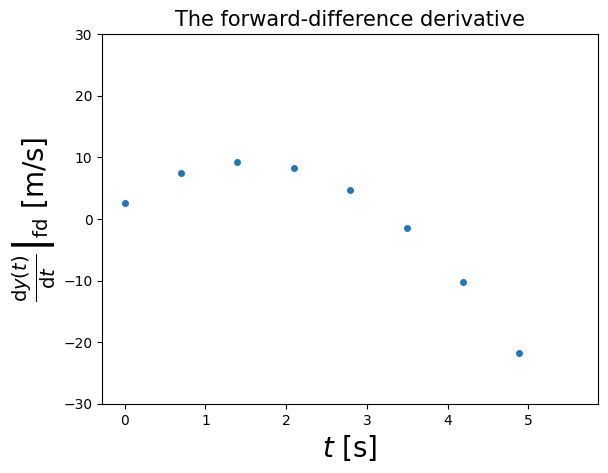

In [3]:
# The forward difference for the points "measured" in our pseudo-experiment:

# the forward difference: 
dydt_FD = [ (y[i+1] - y[i]) / (t[i+1] - t[i]) for i in range(len(y)-1)]

fig, ax = plt.subplots() # create the elements required for matplotlib. 

# set the labels and titles:
ax.set_xlabel(r'$t$ [s]', fontsize=20) # set the x label
ax.set_ylabel(r'$\left. \frac{\mathrm{d} y(t)}{\mathrm{d}t} \right|_\mathrm{fd}$ [m/s]', fontsize=20) # set the y label. 
ax.set_title('The forward-difference derivative', fontsize=15) # set the title 

ax.set_ylim([-30, 30]) # set the y limit

# make a one-dimensional plot using the above arrays, add a custom label
ax.plot(t[:-1], dydt_FD, lw=0, ms=4, marker='o') 

plt.show() # show the plot here

### Example 4.2: Calculate the forward-difference derivatives for f(t) = \cos t and g(t) = \exp(t) at t=0.1, 1., 100, for h=10^{-6}. Compare to the analytic results.

In [4]:
import math

# define a function for the forward-difference derivative.
# In Python, you can pass a function as an argument to another function. This is known as a higher-order function.
def dfdt_FD(func, t, h):
    """Calculates the forward-difference derivative of a function func at t, with step size h"""
    return (func(t+h) - func(t))/h

# calculate the derivatives at various points in an array t:
tarray = [0.1, 1., 100.]

# the step h is taken to be 1E-6:
h = 1E-6

# for the cos function:
for t in tarray:
    print('d(cos(t))/dt at t=', t, '=', dfdt_FD(math.cos,t,h), 'vs analytic=', -math.sin(t), 'with error=', abs(dfdt_FD(math.cos,t,h)-(-math.sin(t))))

# for the exp function:
for t in tarray:
    print('d(exp(t))/dt at t=', t, '=', dfdt_FD(math.exp,t,h), 'vs analytic=', math.exp(t), 'with error=', abs(dfdt_FD(math.exp,t,h)-(math.exp(t))))

    

d(cos(t))/dt at t= 0.1 = -0.09983391424661647 vs analytic= -0.09983341664682815 with error= 4.975997883183148e-07
d(cos(t))/dt at t= 1.0 = -0.8414712548976411 vs analytic= -0.8414709848078965 with error= 2.7008974456954604e-07
d(cos(t))/dt at t= 100.0 = 0.5063652087633486 vs analytic= 0.5063656411097588 with error= 4.323464102284902e-07
d(exp(t))/dt at t= 0.1 = 1.105171470561217 vs analytic= 1.1051709180756477 with error= 5.524855692939923e-07
d(exp(t))/dt at t= 1.0 = 2.7182831874306146 vs analytic= 2.718281828459045 with error= 1.3589715694983795e-06
d(exp(t))/dt at t= 100.0 = 2.6881184788443713e+43 vs analytic= 2.6881171418161356e+43 with error= 1.3370282356702364e+37


We will discuss errors in a bit! First let's consider more algorithms for differentiation! 

### The Central-Difference Derivative

Rather than making a single step $h$ forward, we can make half a step forward and half a step backward to get the central-difference derivative:

$ \left.\frac{ \mathrm{d} y(t) } {\mathrm{d} t } \right|_\mathrm{cd} \equiv \frac{ y(t+h/2) - y(t-h/2) } { h} $.

To get an estimate of the algorithmic error, we first write down the Taylor series for $y(t+h/2)$ and $y(t-h/2)$:

$y(t+h/2) = y(t) + \frac{h}{2} y'(t) + \frac{h^2}{8} y''(t) + \frac{h^3}{48} y'''(t) + \mathcal{O}(h^4)$

$y(t-h/2) = y(t) - \frac{h}{2} y'(t) + \frac{h^2}{8} y''(t) - \frac{h^3}{48} y'''(t) + \mathcal{O}(h^4)$

and we subtract them to get:

$y(t+h/2) - y(t-h/2) = h y'(t) + \frac{h^3}{24} y'''(t)+ \mathcal{O}(h^5)$

All terms with an even power of $h$ vanish! 

so: 

$ \left.\frac{ \mathrm{d} y(t) } {\mathrm{d} t } \right|_\mathrm{cd} = y'(t) + \frac{1}{24} h^2 y'''(t) + \mathcal{O}(h^5)$.

The central-difference algorithm is accurate to order $h^2$ instead of $h$.

Therefore, if the function is smooth, then one would expect $y''' h^2 / 24 \ll y'' h / 2$, and we would expect the central-difference error to be much smaller than that with the forward-difference. 

Let's compare the results of Example 4.2, calculated with the forward-difference algorithm, now with the central-difference algorithm: 

#### Example 4.3: Calculate as in Example 4.2, but with the central-difference derivative

In [5]:
# define a function for the central-difference derivative.
def dfdt_CD(func, t, h):
    """Calculates the central-difference derivative of a function func at t, with step size h"""
    return (func(t+h/2) - func(t-h/2))/h

# calculate the derivatives at various points in an array t:
tarray = [0.1, 1., 100.]

# the step h is taken to be 1E-8:
h = 1E-6

# for the cos function:
for t in tarray:
    print('d(cos(t))/dt at t=', t, '=', dfdt_CD(math.cos,t,h), 'vs analytic=', -math.sin(t), 'with error=', abs(dfdt_CD(math.cos,t,h)-(-math.sin(t))))

# for the exp function:
for t in tarray:
    print('d(exp(t))/dt at t=', t, '=', dfdt_CD(math.exp,t,h), 'vs analytic=', math.exp(t), 'with error=', abs(dfdt_CD(math.exp,t,h)-(math.exp(t))))


d(cos(t))/dt at t= 0.1 = -0.09983341664465684 vs analytic= -0.09983341664682815 with error= 2.17131868041065e-12
d(cos(t))/dt at t= 1.0 = -0.8414709847803792 vs analytic= -0.8414709848078965 with error= 2.7517321754544355e-11
d(cos(t))/dt at t= 100.0 = 0.5063656397519267 vs analytic= 0.5063656411097588 with error= 1.3578320690044166e-09
d(exp(t))/dt at t= 0.1 = 1.10517091811424 vs analytic= 1.1051709180756477 with error= 3.859224051439014e-11
d(exp(t))/dt at t= 1.0 = 2.7182818285176324 vs analytic= 2.718281828459045 with error= 5.858735718788921e-11
d(exp(t))/dt at t= 100.0 = 2.6881171349366646e+43 vs analytic= 2.6881171418161356e+43 with error= 6.879470977972417e+34


For the specific choice of $h$, the central-difference algorithm is clearly better! (But see below for an analysis of errors in each).

### Extrapolated-Difference Derivative

We can extend the central-difference approximation to use quarter steps instead of half steps, i.e., calculate:

$ \left.\frac{ \mathrm{d} y(t,h/2) } {\mathrm{d} t } \right|_\mathrm{cd} \equiv \frac{ y(t+h/4) - y(t-h/4) } { h/2 } $.


As before, expanding via Taylor series $y(t+h/4)$ and $y(t-h/4)$ yields an estimate of the approximation error:

$ \left.\frac{ \mathrm{d} y(t,h/2) } {\mathrm{d} t } \right|_\mathrm{cd} \simeq y'(t) + \frac{h^2}{96} y'''(t) + \mathcal{O}(h^4)$

If we define $D_\mathrm{cd} y(t,h) \equiv \left.\frac{ \mathrm{d} y(t,h) } {\mathrm{d} t } \right|_\mathrm{cd}$, we can combine two central-difference approximations to get the *extended-difference algorithm* as follows:

$\left.\frac{ \mathrm{d} y(t) } {\mathrm{d} t } \right|_\mathrm{ed} \equiv \frac{ 4 D_\mathrm{cd} y(t, h/2) - D_\mathrm{cd} y (t,h) }{3}$.

And it can be shown (again via Taylor series expansions) that this algorithm has an error of $\mathcal{O}(h^4)$: 

$\left.\frac{ \mathrm{d} y(t) } {\mathrm{d} t } \right|_\mathrm{ed} \simeq y'(t) - \frac{h^4}{4 \cdot 16 \cdot 120}y^{(5)}(t) + ... $.

Finally, when working with the aproximations, it is important to remember that they may work for well-behaved functions, they may fail badly for functions containing noise, which will most likely be the case if they are coming from measurements or other computations. In that case, it may be necessary to "smooth" the data or fit them with some analytic function (see later chapter) and then differentiate. 

## Error Assessment in Numerical Differentiation

### Introduction

Numerical algorithms play a vital role in computational physics. When you encounter/invent and implement an algorithm, you must assess the following:

1. Does it converge?
2. How precise are the converged results?
3. How fast does it run?

You may think that all algorithms converge if enough terms are used, and that if you want more precision you just use more terms! 

But this is not always possible: some algorithms are asymptotic expansions that approximate a function in certain regions of parameter space, and converge only up to a point. 

However, even if the series that underlies an algorithm is uniformly convergent, including more terms will decrease the algorithmic error, but will also *increase* the round-off errors that we previously discussed. And because round-off errors eventually diverge to infinity, we need to find the "sweet-spot" for the approximations. 

Good algorithms require fewer steps and thus incur less round-off error! 

The algorithmic (or approximation) errors, $\epsilon_\mathrm{alg}$ in numerical differentiation decrease with decreasing step size, $h$. In turn, round-off errors, $\epsilon_\mathrm{ro}$, increase with decreasing step size. 

The best value of $h$ has to minimize the total error: 

$\epsilon_\mathrm{tot} = \epsilon_\mathrm{alg} + \epsilon_\mathrm{ro}$.

This "sweet spot" occurs when both errors are of the same order, i.e.:

$\epsilon_\mathrm{alg} \simeq \epsilon_\mathrm{ro}$.

In the case of numerical differentiation, e.g. via the forward-difference algorithm, $\left. \frac{ \mathrm{d} y(t) } {\mathrm{d} t }\right|_\mathrm{fd} =  \frac{ y(t+h) - y(t) } { h} $, as $h$ is made continually smaller, we will eventually reach the worst-case round-off error where $y(t+h)$ and $y(t)$ differ by the machine precision $\epsilon_m$. In that worst-case scenarion, the round-off error is:

$\epsilon_\mathrm{ro} \simeq \frac{\epsilon_m}{h}$.

Therefore, for the forward-difference algorithm, the sweet-spot $h$ occurs when:

$\frac{\epsilon_m}{h} \simeq \epsilon_\mathrm{alg}^\mathrm{fd} = \frac{h y''}{2}$ or $h_\mathrm{fd} = \sqrt{ \frac{2 \epsilon_m}{y''}}$.

For the central-difference algorithm:

$\frac{\epsilon_m}{h} \simeq \epsilon_\mathrm{alg}^\mathrm{cd} = \frac{h^2 y'''}{24}$ or $h_\mathrm{cd} = \sqrt[3]{ \frac{24 \epsilon_m}{y'''}}$.

Let's assume that we have a function for which $y' \simeq y'' \simeq y'''$ at the point of interest $t$, which may be crude in general, but works reasonably for $\cos t$ and $\exp(t)$. For double precision floats, $\epsilon_m \simeq 10^{-15}$, and then: 

$h_\mathrm{fd} \simeq 4 \times 10^{-8}$ which leads to $\epsilon_\mathrm{fd} \simeq \frac{\epsilon_m}{h_\mathrm{fd}} \simeq 3\times 10^{-8}$,

and:

$h_\mathrm{cd} \simeq 3 \times 10^{-5}$ which leads to $\epsilon_\mathrm{cd} \simeq \frac{\epsilon_m}{h_\mathrm{cd}}\simeq 3\times 10^{-11}$,

One can observe that in this case, the central-difference algorithm achieves smaller error for a larger $h$ value! Let's now re-calculate the values of the derivatives of $\cos t$ and $\exp(t)$ using the "sweet-spot" step sizes in the next example. 


#### Example 4.4: Use the sweet-spot values of the step size to calculate the derivatives of \cos (t) and \exp(t) at the same points as the previous examples.

In [6]:
# We can use the functions already defined in this notebook for the forward difference and central difference. 

# Forward difference: 
# the step h is taken to be 4E-8:
h = 4E-8

print('Forward difference:')
# for the cos function:
for t in tarray:
    print('d(cos(t))/dt at t=', t, '=', dfdt_FD(math.cos,t,h), 'vs analytic=', -math.sin(t), 'with error=', abs(dfdt_FD(math.cos,t,h)-(-math.sin(t))))

# for the exp function:
for t in tarray:
    print('d(exp(t))/dt at t=', t, '=', dfdt_FD(math.exp,t,h), 'vs analytic=', math.exp(t), 'with error=', abs(dfdt_FD(math.exp,t,h)-(math.exp(t))))

# Central difference: 
# the step h is taken to be 3E-5:
h = 3E-5

print('\nCentral difference:')
# for the cos function:
for t in tarray:
    print('d(cos(t))/dt at t=', t, '=', dfdt_CD(math.cos,t,h), 'vs analytic=', -math.sin(t), 'with error=', abs(dfdt_CD(math.cos,t,h)-(-math.sin(t))))

# for the exp function:
for t in tarray:
    print('d(exp(t))/dt at t=', t, '=', dfdt_CD(math.exp,t,h), 'vs analytic=', math.exp(t), 'with error=', abs(dfdt_CD(math.exp,t,h)-(math.exp(t))))

Forward difference:
d(cos(t))/dt at t= 0.1 = -0.09983343873809503 vs analytic= -0.09983341664682815 with error= 2.2091266871360205e-08
d(cos(t))/dt at t= 1.0 = -0.8414709956605648 vs analytic= -0.8414709848078965 with error= 1.085266831957199e-08
d(cos(t))/dt at t= 100.0 = 0.5063656660642124 vs analytic= 0.5063656411097588 with error= 2.4954453614611793e-08
d(exp(t))/dt at t= 0.1 = 1.1051709380982544 vs analytic= 1.1051709180756477 with error= 2.0022606683767208e-08
d(exp(t))/dt at t= 1.0 = 2.7182818884696758 vs analytic= 2.718281828459045 with error= 6.001063068694634e-08
d(exp(t))/dt at t= 100.0 = 2.6881174087690013e+43 vs analytic= 2.6881171418161356e+43 with error= 2.669528657119537e+36

Central difference:
d(cos(t))/dt at t= 0.1 = -0.09983341664465684 vs analytic= -0.09983341664682815 with error= 2.17131868041065e-12
d(cos(t))/dt at t= 1.0 = -0.8414709847766784 vs analytic= -0.8414709848078965 with error= 3.121813918482985e-11
d(cos(t))/dt at t= 100.0 = 0.5063656412507278 vs analy

These are of the same order as we expected from our considerations! 

Let's now dig deeper into the errors to get a visual representation of what's happening. 

#### Example 4.5: Using the known analytical results calculate the *relative error*, \varepsilon, obtained by both methods for the \cos(t) and \exp(t) functions at t=0.1, for varying step size h down to h\simeq \epsilon_m \simeq 10^{-15} and plot \log_{10}|\varepsilon| vs. \log_{10} h. Comment on the behavior at small and large h

In [7]:
import numpy as np
# First, let's create the array of h:
harray = np.logspace(-1, -15, num=100,base=10) # the NumPy logspace returns numbers spaced evenly on a log scale.

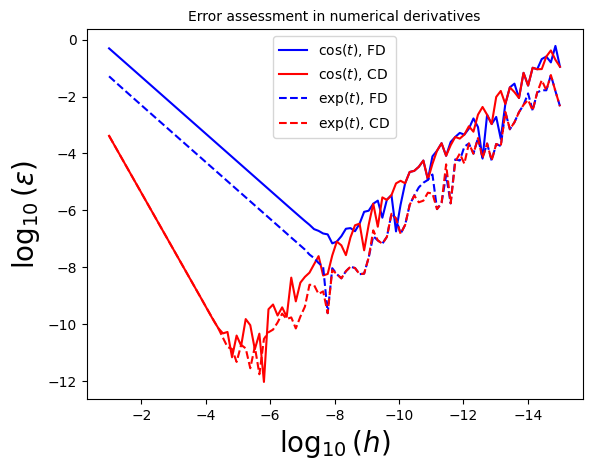

In [8]:
# Then let's calculate the relative error and take the log (base 10) for each of the two algorithms:

# fix the point we are examining: 
t = 0.1

# Let's use list comprehension!
# cosine: 
log10_rel_error_cos_FD = [math.log10( abs( (dfdt_FD(math.cos,t,h) - (-math.sin(t))) / -math.sin(t) ) ) for h in harray] # Forward-difference 
log10_rel_error_cos_CD = [math.log10( abs( (dfdt_CD(math.cos,t,h) - (-math.sin(t))) / -math.sin(t) ) ) for h in harray] # Centra-Difference

# exp: 
log10_rel_error_exp_FD = [math.log10( abs( (dfdt_FD(math.exp,t,h) - (math.exp(t))) / math.exp(t) ) ) for h in harray] # Forward-difference 
log10_rel_error_exp_CD = [math.log10( abs( (dfdt_CD(math.exp,t,h) - (math.exp(t))) / math.exp(t) ) ) for h in harray] # Centra-Difference


# get the log10 of h:
log10_h = [math.log10(h) for h in harray]
    
# Now plot! Don't forget the different labels! 
fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$\log_{10}(h)$', fontsize=20) # set the x label
ax.set_ylabel(r'$\log_{10}(\varepsilon)$', fontsize=20) # set the y label. Note that the 'r' is necessary to remove the need for double slashes. You can use LaTeX! 
ax.set_title('Error assessment in numerical derivatives', fontsize=10) # set the title 

# make a one-dimensional plot using the arrays relevant to the cosine:
ax.plot(log10_h, log10_rel_error_cos_FD, label=r'$\cos(t)$, FD', ls='-', color='blue') 
ax.plot(log10_h, log10_rel_error_cos_CD, label=r'$\cos(t)$, CD', ls='-', color='red') 
# make a one-dimensional plot using the arrays relevant to the exponential:
# change the linestyle!
ax.plot(log10_h, log10_rel_error_exp_FD, label=r'$\exp(t)$, FD', ls='--', color='blue') 
ax.plot(log10_h, log10_rel_error_exp_CD, label=r'$\exp(t)$, CD', ls='--', color='red') 

# ivnert the axes to show smaller values of h to the right:
ax.invert_xaxis()

# construct the legend:
ax.legend(loc='upper center')  # Add a legend

plt.show() # show the plot here

Now let's do the same exercise in class, with $f(t) = \exp(t) \cos(t)$!


#### Example 4.6: Take the numerical derivative of the function f(t) = \exp(t) \cos(t) at t=0.1, and following Example 4.5, perform an error assessment. 

(Solution in a separate notebook, Example4.6)

## Numerical Integration

### Introduction

A traditional way to perform integration by hand is to take a piece of graph paper and count the number of boxes, or *quadrilaterals* lying below the curve. 

This is why numerical integration is also known as numerical *quadrature*, even when the method employed is much more sophisticated than simple box counting. 

We start of our discussion of numerical integration with the Riemann definition of an integral, as the limit of the sum over boxes under a curve, as the box width $h$ approaches zero:

$\int_a^b f(x) \mathrm{d} x = \lim_{h\rightarrow 0} \left[ h \sum_{i=1}^{(b-a)/h} f(x_i) \right]$,

where $(b-a)/h = N$ counts the number of boxes. 

The figure below is a graphical representation of the quadrature procedure: 

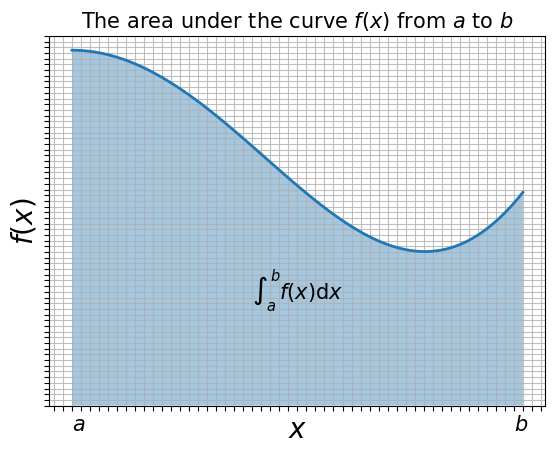

In [9]:
import matplotlib.ticker as ticker # 

# define the x array and calculate over it the function to display 
x = np.linspace(0, 1,100)
f = 0.5-np.power(x,2) + np.power(x,4) - 0.2* np.power(x,6)

fig, ax = plt.subplots() # create the elements required for matplotlib. 

# set the labels and titles:
ax.set_xlabel(r'$x$', fontsize=20) # set the x label
ax.set_ylabel(r'$f(x)$', fontsize=20) # set the y label. 
ax.set_title(r'The area under the curve $f(x)$ from $a$ to $b$', fontsize=15) # set the title 

# put the ticks closer together:
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.02))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.008))

# set the axis limits:
ax.set_ylim(0,0.520)

# make a one-dimensional plot using the above arrays, add a custom label
ax.plot(x, f, lw=2) 

# fill the area under the curve:
ax.fill_between(x, 0, f,alpha=0.4)

# put a grid on the graph:
ax.grid(True, which='both', alpha=0.8)

# hide x and y axes label marks
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

# put text at the right points on the x-axis:
ax.text(0,-0.035, '$a$', fontsize=15)
ax.text(0.98,-0.035, '$b$', fontsize=15)

# put the integral in the shaded region:
ax.text(0.4, 0.15, r'$\int_a^b f(x) \mathrm{d} x $', fontsize=15)


plt.show() # show the plot here

The numerical integral of a function $f(x)$ is approximated as a finite sum over boxes of height $f(x_i)$ and width $w_i$: 

$\int_a^b f(x) \mathrm{d} x \simeq \sum_{i=1}^N f(x_i) w_i$.

In this case the box width is finite. The above formula represents the standard form for all integration algorithms: the function $f(x)$ is evaluated at $N$ points in the interval $[a,b]$, and the function values $f_i \equiv f(x_i)$ are summed with each term in the sum weighted by $w_i$. 

Generally, the precision increases as the number of points $N$ gets larger, with the round-off error eventually limiting the increase. This is similar to what we observed in the case of differentiation. 

A word of warning: in general, you should not attempt a numerical integration of an integrand that contains a singularity, without first removing the singularity by hand. You may be able to do this very simply by breaking the intervals down into several subintervals so that the singularity is at an endpoint where an integration point is not placed, or by change of variable. 

Also, if the integrand has a very slow variation in some region, you can speed up the integration by changing to a variable that compresses that region and places fewer points there, or divides up the integral and performs several integrations. 
|
Conversely, if your integrand has a very rapid variation in some region, you may want to change to variables that expand that region, to ensure that no oscillations (e.g.) are missed. 

### The Trapezoid Rule

The trapezoid (British: trapezium) rule uses *evenly-spaced values* of $x$, i.e. $N$ points $x_i$ ($i=1,...N$), spaced at a distance $h$ apart throughout the integration region $[a,b]$ and includes the endpoints of the integration region. 

This means that there are $(N-1)$ intervals of length $h$: 

$h = \frac{b-a}{N-1}$, $x_i = a + (i-1) h$, $i=1,...,N$,

where we note that counting starts at $i=1$ in the above formulae. 

The trapezoid rule takes each integration interval $i$ and constructs a trapezoid of width $h$ in it. This approximates $f(x)$ by a straight line in each interval $i$ and uses the average height of the function at the edges of the straight line as the value for $f$, i.e. $(f_i + f_{i+1})/2$. 

The area of each such trapzoid is then:

$\int_{x_i}^{x_i + h} f(x) \mathrm{d}x \simeq h \frac{ (f_i + f_{i+1}) } {2}  = \frac{1}{2} h f_i + \frac{1}{2}  hf_{i+1}$

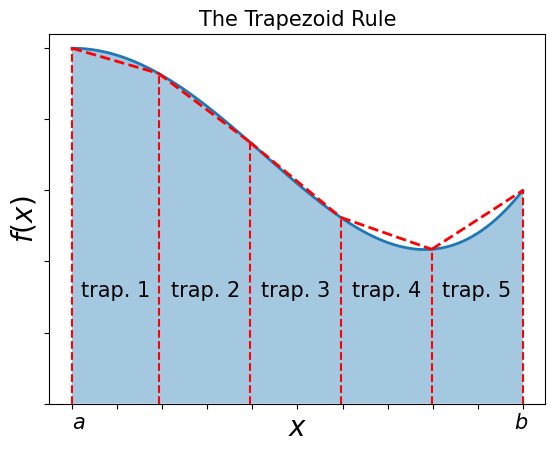

In [10]:
import numpy as np
import matplotlib.ticker as ticker # 

# define the x array and calculate over it the function to display 
x = np.linspace(0, 1,100)
f = 0.5-np.power(x,2) + np.power(x,4) - 0.2* np.power(x,6)

fig, ax = plt.subplots() # create the elements required for matplotlib. 

# set the labels and titles:
ax.set_xlabel(r'$x$', fontsize=20) # set the x label
ax.set_ylabel(r'$f(x)$', fontsize=20) # set the y label. 
ax.set_title(r'The Trapezoid Rule', fontsize=15) # set the title 

# put the ticks closer together:
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))

# set the axis limits:
ax.set_ylim(0,0.520)

# make a one-dimensional plot using the above arrays, add a custom label
ax.plot(x, f, lw=2) 

# draw vertical lines to denote the limits of the trapezoids:
ax.vlines(0, 0, f[0], ls='--',color='red')
ax.vlines(x[19], 0, f[19], ls='--', color='red')
ax.vlines(x[39], 0, f[39], ls='--', color='red')
ax.vlines(x[59], 0, f[59], ls='--', color='red')
ax.vlines(x[79], 0, f[79], ls='--', color='red')
ax.vlines(x[99], 0, f[99], ls='--', color='red')

# show the trapezoid edges: 
ax.plot([x[0], x[19]], [f[0],f[19]], ls='--', lw=2, color='red')
ax.plot([x[19], x[39]], [f[19],f[39]], ls='--', lw=2, color='red')
ax.plot([x[39], x[59]], [f[39],f[59]], ls='--', lw=2, color='red')
ax.plot([x[59], x[79]], [f[59],f[79]], ls='--', lw=2, color='red')
ax.plot([x[79], x[99]], [f[79],f[99]], ls='--', lw=2, color='red')

# label the trapezoids:
ax.text(0.02, 0.15, 'trap. 1', fontsize=15)
ax.text(0.22, 0.15, 'trap. 2', fontsize=15)
ax.text(0.42, 0.15, 'trap. 3', fontsize=15)
ax.text(0.62, 0.15, 'trap. 4', fontsize=15)
ax.text(0.82, 0.15, 'trap. 5', fontsize=15)


# fill the area under the curve:
ax.fill_between(x, 0, f,alpha=0.4)

# hide x and y axes label marks
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

# put text at the right points on the x-axis:
ax.text(0,-0.035, '$a$', fontsize=15)
ax.text(0.98,-0.035, '$b$', fontsize=15)

plt.show() # show the plot here

In order to apply the trapezoid rule to the entire region $[a,b]$, we add the contributions from each subinterval: 

$\int_a^b f(x) \mathrm{d} x \simeq \frac{h}{2} f_1 + h f_2 + h f_3 + ... + h f_{N-1} + \frac{h}{2} f_N$.

Note that the "internal" points are counted twice: the end of one interval is the beginning of the next.

The trapezoid rule can be written in terms of the "weight" formula as follows: 

$\int_a^b f(x) \mathrm{d} x \simeq \sum_{i=1}^N f(x_i) w_i$, $w_i = \left\{ \frac{h}{2}, h, ..., h, \frac{h}{2} \right\}$.

Let's write a function that implements the trapezoid rule! 

#### Example 4.7: Construct a function that implements the trapezoid rule on an interval [a,b] using N points, and use to integrate f(x) = \exp(-x) in the interval [0,1]. Compare to the analytic value for N=10^6 intervals.

In [11]:
import math

# Let's write a higher-order function that implements the trapezoid rule:
def trapezoid(func, a, b, N):
    """Calculates the numerical integral of a function in the interval a,b using the trapezoid rule for N points"""
    # calculate the width:
    h = (b - a)/(N-1)
    # apply the trapezoid rule: 
    # the contributions from the first and last points: 
    integral = h*(func(a) + func(b))/2 
    # the contributions from the remaining points: 
    for i in range(1, int(N-1)):
        integral = integral + h*func(a + i * h)
    return integral


# test the function for exp(-t) in [0,1]:
# first define the function we wish to integrate: 
def f(x):
    return math.exp(-x)
N = 1E6 # the number of points
trap_int = trapezoid(f,0,1,N)
print('Integral of exp(-t) in [0,1] via the trapezoid rule=', trap_int)

# the analytic integral is simply 1 - exp(-1):
analytic_int = 1 - math.exp(-1)
print('Analytic integral=', analytic_int)

# compare by calculating the fractional error:
print('Fractional error=', abs( (trap_int-analytic_int)/analytic_int ) )


Integral of exp(-t) in [0,1] via the trapezoid rule= 0.632120558828617
Analytic integral= 0.6321205588285577
Fractional error= 9.378892789826624e-14


### Simpson's Rule

Simpson's rule approximates the integrand, $f(x)$, by a parabola for each interval: 

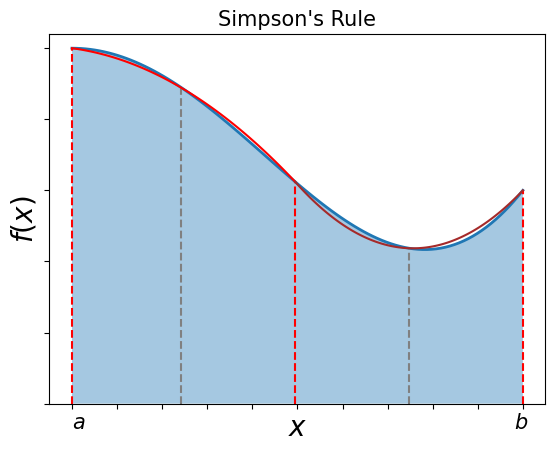

In [12]:
import numpy as np
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import matplotlib.ticker as ticker # 

# define a function to plot the Simpson rule parabolas:
def SimpsonParabola(func, xinterval):
    xx = np.linspace(xinterval[0],xinterval[-1],100)
    # calculate the coefficients of the quadratic:
    a = xinterval[0]
    b = xinterval[-1]
    fa = func(a)
    fb = func(b)
    fm = func( (a + b)/2 )
    alpha = (2*fa + 2*fb - 4*fm)/(a**2 - 2*a*b + b**2)
    beta = (-a*fa - 3*a*fb + 4*a*fm - 3*b*fa - b*fb + 4*b*fm)/(a**2 - 2*a*b + b**2)
    gamma = (a**2*fb + a*b*fa + a*b*fb - 4*a*b*fm + b**2*fa)/(a**2 - 2*a*b + b**2)
    return xx, alpha * np.power(xx,2) + beta * xx + gamma
    
# the "lambda" method allows you to define a function on a single line:
integrand = lambda y: 0.5-np.power(y,2) + np.power(y,4) - 0.2* np.power(y,6)

# define the x array and calculate over it the function to display 
x = np.linspace(0, 1,100)
f = integrand(x)

fig, ax = plt.subplots() # create the elements required for matplotlib. 

# set the labels and titles:
ax.set_xlabel(r'$x$', fontsize=20) # set the x label
ax.set_ylabel(r'$f(x)$', fontsize=20) # set the y label. 
ax.set_title(r"Simpson's Rule", fontsize=15) # set the title 

# put the ticks closer together:
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))

# set the axis limits:
ax.set_ylim(0,0.520)

# make a one-dimensional plot using the above arrays, add a custom label
ax.plot(x, f, lw=2) 

# draw vertical lines to denote the limits of the intervals:
ax.vlines(0, 0, f[0], ls='--',color='red')
ax.vlines(x[24], 0, f[24], ls='--', color='grey')

ax.vlines(x[49], 0, f[49], ls='--', color='red')
ax.vlines(x[74], 0, f[74], ls='--', color='grey')
ax.vlines(x[99], 0, f[99], ls='--', color='red')

# Plot the Simpson rule parabolas:
xxp, yyp = SimpsonParabola(integrand, [0,x[49]])
ax.plot(xxp, yyp, color='red')
xxp, yyp = SimpsonParabola(integrand, [x[49],x[99]])
ax.plot(xxp, yyp, color='brown')

# fill the area under the curve:
ax.fill_between(x, 0, f,alpha=0.4)

# hide x and y axes label marks
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

# put text at the right points on the x-axis:
ax.text(0,-0.035, '$a$', fontsize=15)
ax.text(0.98,-0.035, '$b$', fontsize=15)

plt.show() # show the plot here

i.e.: $f(x) \simeq \alpha x^2 + \beta x + \gamma$ 

The intervals are equally spaced (red and grey dashes separate them). The area under the parabola for each interval is:

$\int_{x_i}^{x_i + h} (\alpha x^2 + \beta x + \gamma)\mathrm{d} x = \left. \frac{ \alpha x^3 }{3} + \frac{ \beta x^2 }{2} + \gamma x \right|_{x_i}^{x_i + h}$

For simplicity, consider an interval from -1 to 1:

$\int_{-1}^{1} (\alpha x^2 + \beta x + \gamma)\mathrm{d} x = \frac{2 \alpha}{3} + 2\gamma$

But also notice that: 

$f(-1) = \alpha - \beta + \gamma$, $f(0) = \gamma$ and $f(1) = \alpha + \beta + \gamma$. 

Solving these for $\alpha$, $\beta$ and $\gamma$:

$\alpha= \frac{f(1) + f(-1)}{2} - f(0)$,

$\beta = \frac{ f(1) - f(-1) } { 2 } $,

$\gamma = f(0)$.

We can substitute for $\alpha$ and $\gamma$ to express the integral as the weighted sum over the values of the function at these three points: 

$\int_{-1}^{1} (\alpha x^2 + \beta x + \gamma)\mathrm{d} x = \frac{f(-1)}{3} +  \frac{4f(0)}{3} + \frac{ f(1)}{3}$.

Three values of the function are needed in each interval! 

However, if we combine two intervals, we only need to evaluate the function at the two endpoints and in the middle: 

$\int_{x_i-h}^{x_i + h } f(x) \mathrm{d} x = \int_{x_i-h}^{x_i} f(x) \mathrm{d} x + \int_{x_i}^{x_i + h } f(x) \mathrm{d} x \simeq \frac{h}{3} f_{i-1} + \frac{ 4 h } {3} f_i + \frac{h}{3} f_{i+1}$.

Therefore, Simpson's rule requires integration to be over pairs of intervals (i.e. separated by the grey lines in the figure above). 

This implies that the total number of intervals must be even, and the total number of points must be odd!

In order to apply Simpson's rule to the entire interval, we add up the contributions from each *pair of subintervals*, counting all all but the first and last endpoints twice, i.e.:

$\int_{a}^{b} f(x) \mathrm{d} x \simeq \frac{h}{3} f_1 + \frac{4h}{3} f_2 + \frac{2h}{3} f_3 + \frac{4h}{3} f_4 + ... + \frac{4h}{3} f_{N-1} + \frac{h}{3} f_N$.

In terms of the standard integration rule with weights: 

$\int_a^b f(x) \mathrm{d} x \simeq \sum_{i=1}^N f(x_i) w_i$, $w_i = \left\{ \frac{h}{3}, \frac{4h}{3}, \frac{2h}{3}, \frac{4h}{3}, ..., \frac{4h}{3}, \frac{h}{3} \right\}$.

The sum of the weights themselves provides a useful check on your implementation:

$\sum_{i=1}^N w_i = (N-1)h$.

And remember that the number of points $N$ must be odd for Simpson's rule! 

#### Example 4.8: Construct a function that implements Simpson's rule on an interval [a,b] using N points (N is odd!), and use to integrate f(x) = \exp(-x) in the interval [0,1]. 

- Check that your sum of weights agrees with $\sum_{i=1}^N w_i = (N-1)h$.
- Compare to the analytic value for $N=2001$ points.
- Also compare to the result obtained in Example 4.7 using the trapezoid rule and $N=10^6$ points. 

You should find that Simpson's rule with $N=2001$ points performs better than the trapezoid rule with $N=10^6$ points!

### Gaussian Quadrature

In a similar manner as we did before, let's rewrite the basic integration formula as follows:

$\int_{-1}^1 f(x) \mathrm{d} x \simeq \sum_{i=1}^N f(x_i) w_i$.

Gaussian quadrature consists of $N$ points and weights that are chosen to make the integration *exact* if $f(x)$ is a $(2N-1)$-degree polynomial!

In contrast to the equally-spaced rules (trapezoid/Simpson's) that we have already seen, there is never an integration point at the extremes of intervals. The values of the points and weights change as the number of points $N$ changes, and the points are *not equally spaced*. 

For ordinary (also known as Gauss-Legendre) Gaussian integration, the points, $x_i$ turn out to be the $N$ zeros of the degree $N$ Legendre polynomial $P_N(x)$ on $[-1,1]$. The weights are:

$w_i = \frac{ - 2 } { (N+1) P_N'(x_i) P_{N+1} (x_i) }$

where $P_N'(x)$ is the derivative of the Legendre polynomial. [See the course textbook for more details]. 

Note that for integrals on a finite interval, the following change of variables is used to reduce the $[a,b]$ interval to the standard interval:

$\int_{a}^b f(x) \mathrm{d} x = \frac{b-a}{2} \int_{-1}^1 f\left( \frac{(b-a)x + a + b}{2} \right) \mathrm{d}x$.

Let's use Python special functions to calculate the first few Gauss-Legendre "nodes" and weights.

#### Example 4.9: Use special functions to get the Gauss-Legendre points and weights for N=2 to N=8 points. 

In [13]:
import scipy

# set the number of points
N=2
# we can access special functions using scipy.special.
# The roots of Legendre polynomials can be accessed via:
scipy.special.roots_legendre(N)

# the first array is the array of points and the second is the array pf weights:
xi, wi = scipy.special.roots_legendre(N)

# print them separately for N=2:
print('N=2 Gaussian quadrature, evaluated at:', xi)
print('with weights', wi)

# Now let's also print N=2 to N=8:
for n in range(3,9):
    xi, wi = scipy.special.roots_legendre(n)
    print('n=', n, 'Gaussian quadrature, evaluated at:', xi)
    print('with weights', wi,'\n')

N=2 Gaussian quadrature, evaluated at:

 [-0.57735027  0.57735027]
with weights [1. 1.]
n= 3 Gaussian quadrature, evaluated at: [-0.77459667  0.          0.77459667]
with weights [0.55555556 0.88888889 0.55555556] 

n= 4 Gaussian quadrature, evaluated at: [-0.86113631 -0.33998104  0.33998104  0.86113631]
with weights [0.34785485 0.65214515 0.65214515 0.34785485] 

n= 5 Gaussian quadrature, evaluated at: [-0.90617985 -0.53846931  0.          0.53846931  0.90617985]
with weights [0.23692689 0.47862867 0.56888889 0.47862867 0.23692689] 

n= 6 Gaussian quadrature, evaluated at: [-0.93246951 -0.66120939 -0.23861919  0.23861919  0.66120939  0.93246951]
with weights [0.17132449 0.36076157 0.46791393 0.46791393 0.36076157 0.17132449] 

n= 7 Gaussian quadrature, evaluated at: [-0.94910791 -0.74153119 -0.40584515  0.          0.40584515  0.74153119
  0.94910791]
with weights [0.12948497 0.27970539 0.38183005 0.41795918 0.38183005 0.27970539
 0.12948497] 

n= 8 Gaussian quadrature, evaluated at: [-0.96028986 -0.79666648 -0.52553241 -0.

Let's now use this to evaluate an integral!

#### Example 4.10: Construct a function that implements N-th order Gaussian quadrature in the interval [a,b], and use to integrate f(x) = \exp(-x) in the interval [0,1] for N=8. 

Compare to the results obtained through the trapezoid rule with $N=10^6$ points, and Simpson's rule with $N=2001$ points. 

In [14]:
import math
import scipy # we need scipy for the N-th order Legendre polynomials. 

# Let's write a higher-order function that implements N-th order Gaussian quadrature:
def gauss(func, a, b, N):
    """Calculates the numerical integral of a function in the interval a,b using N-th order Gaussian quadrature"""
    # N-th order Gaussian quadrature 
    # get the weights and points from the scipy special function:
    xi, wi = scipy.special.roots_legendre(int(N))
    # now use the general formula to get the integral:
    integral = 0
    for j, wj in enumerate(wi):
        # calculate the x value using the xi array:
        xj = 0.5*((b-a) * xi[j] + b + a) # transform the xi[j] to the function argument, xj
        integral = integral + wj * func(xj)
    return (b-a)/2 * integral

# test the function for exp(-t) in [0,1]:
# first define the function we wish to integrate: 
def f(x):
    return math.exp(-x)
N = 8 # the order of the Gaussian quadrature
gauss_int = gauss(f,0,1,N)
print("Integral of exp(-t) in [0,1] via N=", 8, "Gaussian quadrature", gauss_int)

# the analytic integral is simply 1 - exp(-1):
analytic_int = 1-math.exp(-1)
print('Analytic integral=', analytic_int)

# compare by calculating the fractional error:
print('Fractional error=', abs( (gauss_int-analytic_int)/analytic_int ) )


Integral of exp(-t) in [0,1] via N= 8 Gaussian quadrature 0.6321205588285578
Analytic integral= 0.6321205588285577
Fractional error= 1.7563469643870083e-16


We have reached extraordinary precision (essentially machine precision) with just 8 points! 

We couldn't reach this precision with $N=10^6$ points and the trapezoid rule, and we needed $N=2001$ points to reach this preecision with Simpson's rule!

### Higher Order Rules (3/8 and Milne Rules)

There exist other interesting "equal intrerval" rules that use higher-order approximations, such as the "3/8" rule and the Milne rule. 

In terms of the formula: $\int_a^b f(x) \mathrm{d} x \simeq \sum_{i=1}^N f(x_i) w_i$, the weights for the 3/8 rule (third-degree approximation) are:

$w_i = (1,3,3,1)\frac{3}{8} h$.

and for the Milne rule (fourth-degree approximation):

$w_i = (14, 64, 24, 64, 14) \frac{h}{45}$. 

A useful check in these cases as well: 

$\sum_{i=1}^N w_i = b -a$.


### Integration Error Assessment

Let's now use the functions for the trapezoid rule, Simpson's rule, and N-th order Gaussian integration to evaluate the behavior of the relative error in each case, for the same function as before, $f(x) = \exp(-x)$, integrated over the interval $[0,1]$, for which we know the analytic form. 

As before, we will make a plot of the $\log_{10}$ of the relative error, versus $\log_{10}$ of the number of points used. 

In [15]:
import math
import numpy as np
import scipy 

Narray = np.concatenate([np.array([2,3,4,5,6,7,8]),np.logspace(1, 4, num=20,base=10)]) # the NumPy logspace returns numbers spaced evenly on a log scale.

# test the function for exp(-t) in [0,1]:
# first define the function we wish to integrate: 
def f(x):
    return math.exp(-x)

# Trapezoid rule result:
I_trapezoid = [trapezoid(f,0,1,N) for N in Narray]

# Simpson's rule result:
# reinstate after we have written the function:
#I_simpson = [simpson(f,0,1,N) for N in Narray]

# Gaussian Quadrature result:
I_gaussian = [gauss(f,0,1,N) for N in Narray]

In [16]:
# Now let's get the relative errors:
I_analytic = 1-math.exp(-1) # use the analytic result

# get the relative errors:
# trapezoid:
eps_trapezoid = np.abs( np.subtract(I_trapezoid,I_analytic)/I_analytic )
# simpson: (uncomment)
# eps_simpson = np.abs( np.subtract(I_simpson,I_analytic)/I_analytic )

eps_gaussian = np.abs( np.subtract(I_gaussian,I_analytic)/I_analytic )
# if a zero has been found, set it to machine precision:
eps_gaussian[eps_gaussian[:] == 0] = np.finfo(np.float64).eps

# get the log10:
log10_eps_trapezoid = np.log10(eps_trapezoid)
# log10_eps_simpson = np.log10(eps_simpson) # UNCOMMENT!
log10_eps_gaussian = np.log10(eps_gaussian)

# and of the array: 
log10_N = np.log10(Narray)

# Now let's plot them! 

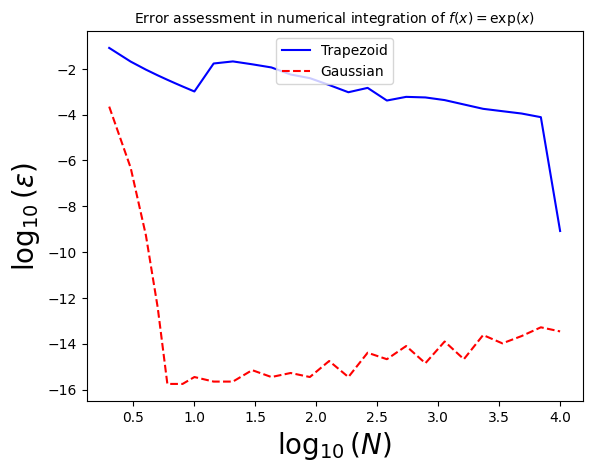

In [17]:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

# Now plot! Don't forget the different labels! 
fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$\log_{10}(N)$', fontsize=20) # set the x label
ax.set_ylabel(r'$\log_{10}(\varepsilon)$', fontsize=20) # set the y label. Note that the 'r' is necessary to remove the need for double slashes. You can use LaTeX! 
ax.set_title(r'Error assessment in numerical integration of $f(x)=\exp(x)$', fontsize=10) # set the title 

# make a one-dimensional plot using the arrays relevant to the cosine:
ax.plot(log10_N, log10_eps_trapezoid, label='Trapezoid', ls='-', color='blue') 
#ax.plot(log10_N, log10_eps_simpson, label='Simpson', ls='-', color='green') 
ax.plot(log10_N, log10_eps_gaussian, label=r'Gaussian', ls='--', color='red') 

# construct the legend:
ax.legend(loc='upper center')  # Add a legend

plt.show() # show the plot here

## Minor Digression: Python functools and partial functions 

The ```functools``` module is for higher-order functions: functions that act on or return other functions. In general, any callable object can be treated as a function for the purposes of this module.

See https://docs.python.org/3/library/functools.html for details.

Here, I wish to discuss ```partial``` functions. 

Suppose we have a function that takes as arguments a variable and two parameters, e.g.:

In [18]:
def myfunction(x, a, b):
    """My function"""
    return a * x + b

Suppose we want to do something with this function, e.g. integrate it in the interval $[0,1]$ for various values of ```a``` and ```b```. We can create a "partial" function and then use it as an argument in our higher-order functions (e.g. ```gauss()```) for integration:

In [19]:
from functools import partial # partial functions allow us to fix a certain number of arguments of a function and generate a new function.

a = [0.1, 0.2, 0.3]
b = [0.4, 0.5, 0.6]

for ai in a:
    for bi in b:
        partial_func = partial(myfunction, a=ai, b=bi) # this has created a new function with the parameters a and b fixed
        # now we can pass this to our integrator!
        print('Integral of a*x+b in [0,1], for a=',ai, 'b=',bi,'=',gauss(partial_func,0,1,4))
        

Integral of a*x+b in [0,1], for a= 0.1 b= 0.4 = 0.45
Integral of a*x+b in [0,1], for a= 0.1 b= 0.5 = 0.5499999999999999
Integral of a*x+b in [0,1], for a= 0.1 b= 0.6 = 0.65
Integral of a*x+b in [0,1], for a= 0.2 b= 0.4 = 0.5
Integral of a*x+b in [0,1], for a= 0.2 b= 0.5 = 0.6000000000000001
Integral of a*x+b in [0,1], for a= 0.2 b= 0.6 = 0.7
Integral of a*x+b in [0,1], for a= 0.3 b= 0.4 = 0.55
Integral of a*x+b in [0,1], for a= 0.3 b= 0.5 = 0.6499999999999999
Integral of a*x+b in [0,1], for a= 0.3 b= 0.6 = 0.7499999999999999
